In [ ]:
# This reads in csvs of injected and retrieved OPD, tip, and tilt in Fizeau PSFs

# Created 2019 May 30 by E.S.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#%matplotlib qt

In [2]:
wavel_um = 3.87
PS = 10.7

In [4]:
# OPD variations alone

trial2_opd_alone_injection = pd.read_csv("../data/trial2_190612_injection.csv", 
                                         names=["time","filename","opd","tip","tilt"])
trial2_opd_alone_retrieved = pd.read_csv("../data/trial2_190612_retrieved.csv", 
                                         names=["time","filename","opd","tip","tilt"])

In [5]:
# tip variations alone

trial3_tip_alone_injection = pd.read_csv("../data/trial3_190612_injection.csv", 
                                         names=["time","filename","opd","tip","tilt"])
trial3_tip_alone_retrieved = pd.read_csv("../data/trial3_190612_retrieved.csv", 
                                         names=["time","filename","opd","tip","tilt"])

In [6]:
# tilt variations alone

trial4_tilt_alone_injection = pd.read_csv("../data/trial4_190612_injection.csv", 
                                         names=["time","filename","opd","tip","tilt"])
trial4_tilt_alone_retrieved = pd.read_csv("../data/trial4_190612_retrieved.csv", 
                                         names=["time","filename","opd","tip","tilt"])

In [7]:
# OPD, tip, and tilt variations simultaneously

trial1_ott_injection = pd.read_csv("../data/trial1_190612_injection.csv", 
                                         names=["time","filename","opd","tip","tilt"])
trial1_ott_retrieved = pd.read_csv("../data/trial1_190612_retrieved.csv", 
                                         names=["time","filename","opd","tip","tilt"])

In [20]:
# choose dataframe

# OPD variations alone
'''
df_inj_choice = trial2_opd_alone_injection.copy() # injected data
df_ret_choice = trial2_opd_alone_retrieved.copy() # retrieved data

# tip variations alone
df_inj_choice = trial3_tip_alone_injection.copy() # injected data
df_ret_choice = trial3_tip_alone_retrieved.copy() # retrieved data
'''
# tilt variations alone
df_inj_choice = trial4_tilt_alone_injection.copy() # injected data
df_ret_choice = trial4_tilt_alone_retrieved.copy() # retrieved data
'''
# all together
df_inj_choice = trial1_ott_injection.copy() # injected data
df_ret_choice = trial1_ott_retrieved.copy() # retrieved data
'''

'\n# all together\ndf_inj_choice = trial1_ott_injection.copy() # injected data\ndf_ret_choice = trial1_ott_retrieved.copy() # retrieved data\n'

In [21]:
# test only
df_inj_choice["elapsed"] = np.subtract(df_inj_choice["time"],df_inj_choice["time"][0])
df_inj_choice.to_csv("junk_elapsed_time.csv")

In [31]:
# get quantities onto common convention

# N.b.: the retrieved OPD is with respect to the nearest wavelength-multiple 
# of OPD

# injected quantities
opd_inj_unwrapped = df_inj_choice["opd"]
opd_inj_simple_mod = np.mod(df_inj_choice["opd"],wavel_um)
opd_inj_positive_side = np.copy(opd_inj_simple_mod)
opd_inj_negative_side = np.copy(opd_inj_simple_mod)
tip_inj_unwrapped = df_inj_choice["tip"]
tip_inj_simple_mod = np.mod(df_inj_choice["tip"],2*PS)
tip_inj_positive_side = np.copy(tip_inj_simple_mod)
tip_inj_negative_side = np.copy(tip_inj_simple_mod)
tilt_inj_unwrapped = df_inj_choice["tilt"]
tilt_inj_simple_mod = np.mod(df_inj_choice["tilt"],2*PS)
tilt_inj_positive_side = np.copy(tilt_inj_simple_mod)
tilt_inj_negative_side = np.copy(tilt_inj_simple_mod)
elapsed_time_inj = np.subtract(df_inj_choice["time"],df_inj_choice["time"][0])

# retrieved quantities
opd_ret = df_ret_choice["opd"]
tip_ret = df_ret_choice["tip"]
tilt_ret = df_ret_choice["tilt"]
elapsed_time_ret = np.subtract(df_ret_choice["time"],df_ret_choice["time"][0])

# injected OPDs, after wrapping, and within an OPD range of (0, +lambda/2)
opd_inj_positive_side[
    ~np.logical_and(opd_inj_simple_mod >= 0,opd_inj_simple_mod < wavel_um/2)] = np.nan
# injected OPDs, after wrapping, and within an OPD range of (-lambda/2, 0)
opd_inj_negative_side[
    ~np.logical_and(opd_inj_simple_mod >= wavel_um/2,opd_inj_simple_mod < wavel_um)] = np.nan
# translate the 'negative' side OPDs
opd_inj_negative_side -= wavel_um
# get the same elements in the abcissa, for readability
elapsed_time_inj = np.subtract(df_inj_choice["time"],df_inj_choice["time"][0])
elapsed_time_inj_opd_positive = np.copy(elapsed_time_inj)
elapsed_time_inj_opd_negative = np.copy(elapsed_time_inj)
elapsed_time_inj_opd_positive[
    ~np.logical_and(opd_inj_simple_mod >= 0,opd_inj_simple_mod < wavel_um/2)] = np.nan
elapsed_time_inj_opd_negative[
    ~np.logical_and(opd_inj_simple_mod >= wavel_um/2,opd_inj_simple_mod < wavel_um)] = np.nan

# injected tip, after wrapping, and within a tilt range of (0, +PS)
tip_inj_positive_side[
    ~np.logical_and(tip_inj_simple_mod >= 0,tip_inj_simple_mod < PS)] = np.nan
# injected tips, after wrapping, and within a tip range of (-PS, 0)
tip_inj_negative_side[
    ~np.logical_and(tip_inj_simple_mod >= PS,tip_inj_simple_mod < 2*PS)] = np.nan
# translate the 'negative' side tips
tip_inj_negative_side -= 2*PS
# get the same elements in the abcissa, for readability
elapsed_time_inj = np.subtract(df_inj_choice["time"],df_ret_choice["time"][0])
elapsed_time_inj_tip_positive = np.copy(elapsed_time_inj)
elapsed_time_inj_tip_negative = np.copy(elapsed_time_inj)
elapsed_time_inj_tip_positive[
    ~np.logical_and(tip_inj_simple_mod >= 0, tip_inj_simple_mod < PS)] = np.nan
elapsed_time_inj_tip_negative[
    ~np.logical_and(tip_inj_simple_mod >= PS, tip_inj_simple_mod < 2*PS)] = np.nan

# injected tilt, after wrapping, and within a tilt range of (0, +PS)
tilt_inj_positive_side[
    ~np.logical_and(tilt_inj_simple_mod >= 0,tilt_inj_simple_mod < PS)] = np.nan
# injected tilts, after wrapping, and within a tip range of (-PS, 0)
tilt_inj_negative_side[
    ~np.logical_and(tilt_inj_simple_mod >= PS,tilt_inj_simple_mod < 2*PS)] = np.nan
# translate the 'negative' side tilts
tilt_inj_negative_side -= 2*PS
# get the same elements in the abcissa, for readability
elapsed_time_inj = np.subtract(df_inj_choice["time"],df_ret_choice["time"][0])
elapsed_time_inj_tilt_positive = np.copy(elapsed_time_inj)
elapsed_time_inj_tilt_negative = np.copy(elapsed_time_inj)
elapsed_time_inj_tilt_positive[
    ~np.logical_and(tilt_inj_simple_mod >= 0, tilt_inj_simple_mod < PS)] = np.nan
elapsed_time_inj_tilt_negative[
    ~np.logical_and(tilt_inj_simple_mod >= PS, tilt_inj_simple_mod < 2*PS)] = np.nan

1
21.0
2
21.0
3
10.399999999999999


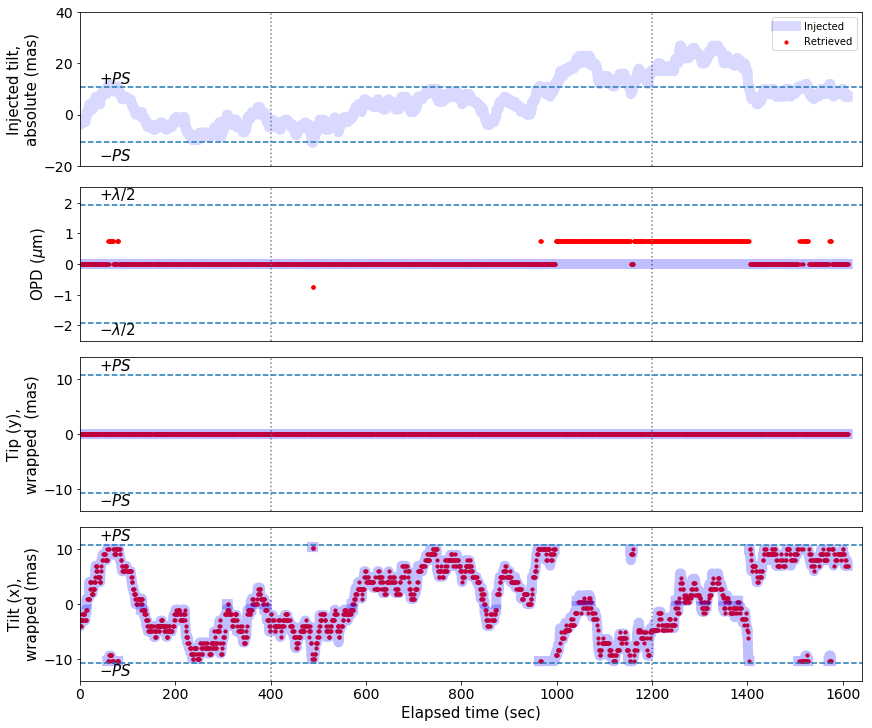

In [23]:
fig = plt.figure(figsize=(12,10), constrained_layout=True)
gs = gridspec.GridSpec(4, 1, figure=fig)

### PLOT NAME
plot_name = "junk.pdf" # make sure to change the choice of dataframe too!

### CHOOSE FIRST PANEL FOR THE UNWRAPPED QUANTITY OF INTEREST
# injected OPD, unwrapped
'''
ax0 = fig.add_subplot(gs[0, :])
ax0.plot(elapsed_time_inj, opd_inj_unwrapped, color = "b", linewidth=10, alpha=0.15)
ax0.axhline(y=wavel_um/2, linestyle = "--")
ax0.axhline(y=-wavel_um/2, linestyle = "--")
ax0.annotate("$+\lambda/2$", xy=(0, 0), xytext=(40, 2.1), textcoords="data")
ax0.annotate("$-\lambda/2$", xy=(0, 0), xytext=(40, -2.3), textcoords="data")
ax0.set_title("Unwrapped injected OPD")
ax0.set_xlim([0,1640])
#ax0.set_ylim([-2.5,2.5])
ax0.set_ylabel("OPD ($\mu$m)")
ax0.set_xlabel("Elapsed time (sec)")
'''

# injected tip, unwrapped
'''
ax0 = fig.add_subplot(gs[0, :])
ax0.plot(elapsed_time_inj, tip_inj_unwrapped, color = "b", linewidth=10, alpha=0.15)
ax0.axhline(y=10.7, linestyle = "--")
ax0.axhline(y=-10.7, linestyle = "--")
ax0.annotate("$+PS$", xy=(0, 0), xytext=(40, 12), textcoords="data")
ax0.annotate("$-PS$", xy=(0, 0), xytext=(40, -18), textcoords="data")
ax0.set_title("Unwrapped injected tip")
ax0.set_xlim([0,1640])
ax0.set_ylim([-20,60])
ax0.set_ylabel("Tip (mas)")
ax0.set_xlabel("Elapsed time (sec)")
'''

# injected tilt, unwrapped
ax0 = fig.add_subplot(gs[0, :])
ax0.axvline(x=400, linestyle=":", color="gray")
ax0.axvline(x=1200, linestyle=":", color="gray")
ax0.plot(elapsed_time_inj, tilt_inj_unwrapped, color = "b", linewidth=10, alpha=0.15, label="Injected")
ax0.scatter(elapsed_time_ret-1000,opd_ret-1000, color="red", s=10, alpha=1, label="Retrieved") # fake; just for legend
ax0.axhline(y=10.7, linestyle = "--")
ax0.axhline(y=-10.7, linestyle = "--")
ax0.annotate("$+PS$", xy=(0, 0), xytext=(40, 12), textcoords="data", fontsize = 15.0)
ax0.annotate("$-PS$", xy=(0, 0), xytext=(40, -18), textcoords="data", fontsize = 15.0)
#ax0.set_title("Unwrapped injected tilt", fontsize = 18.0)
ax0.set_xlim([0,1640])
ax0.set_ylim([-20,40])
ax0.set_ylabel("Injected tilt,\nabsolute (mas)", fontsize = 15.0)
ax0.set_xlabel("Elapsed time (sec)", fontsize = 15.0)
ax0.axes.get_xaxis().set_visible(False)
ax0.tick_params(labelsize=14)
ax0.legend()


### END FIRST PANEL

# OPD
ax1 = fig.add_subplot(gs[1, :])
ax1.axvline(x=400, linestyle=":", color="gray")
ax1.axvline(x=1200, linestyle=":", color="gray")
ax1.plot(elapsed_time_inj, opd_inj_positive_side, color = "b", linewidth=10, alpha=0.25)
ax1.plot(elapsed_time_inj, opd_inj_negative_side, color = "b", linewidth=10, alpha=0.25)
ax1.scatter(elapsed_time_ret,opd_ret, color="red", s=10, alpha=1)
ax1.axhline(y=wavel_um/2, linestyle = "--")
ax1.axhline(y=-wavel_um/2, linestyle = "--")
ax1.annotate("$+\lambda/2$", xy=(0, 0), xytext=(40, 2.1), textcoords="data", fontsize = 15.0)
ax1.annotate("$-\lambda/2$", xy=(0, 0), xytext=(40, -2.3), textcoords="data", fontsize = 15.0)
#ax1.set_title("OPD, wrapped\n(blue = injected; red = retrieved)", fontsize = 18.0)
ax1.set_xlim([0,1640])
ax1.set_ylim([-2.5,2.5])
ax1.set_ylabel("OPD ($\mu$m)", fontsize = 15.0)
ax1.set_xlabel("Elapsed time (sec)", fontsize = 15.0)
ax1.axes.get_xaxis().set_visible(False)
ax1.tick_params(labelsize=14)

# tip
ax2 = fig.add_subplot(gs[2, :])
ax2.axvline(x=400, linestyle=":", color="gray")
ax2.axvline(x=1200, linestyle=":", color="gray")
#ax2.plot(elapsed_time_inj, tip_inj_simple_mod, color = "b", linewidth=10, alpha=0.15)
ax2.plot(elapsed_time_inj, tip_inj_positive_side, color = "b", linewidth=10, alpha=0.25)
ax2.plot(elapsed_time_inj, tip_inj_negative_side, color = "b", linewidth=10, alpha=0.25)
ax2.scatter(elapsed_time_ret, tip_ret, color="red", s=10, alpha=1)
ax2.axhline(y=10.7, linestyle = "--")
ax2.axhline(y=-10.7, linestyle = "--")
ax2.annotate("$+PS$", xy=(0, 0), xytext=(40, 11.5), textcoords="data", fontsize = 15.0)
ax2.annotate("$-PS$", xy=(0, 0), xytext=(40, -13), textcoords="data", fontsize = 15.0)
#ax2.set_title("Tip, wrapped (y)", fontsize = 18.0)
ax2.set_xlim([0,1640])
ax2.set_ylim([-14,14])
ax2.set_ylabel("Tip (y),\nwrapped  (mas)", fontsize = 15.0)
ax2.set_xlabel("Elapsed time (sec)", fontsize = 15.0)
ax2.axes.get_xaxis().set_visible(False)
ax2.tick_params(labelsize=14)

# tilt
ax3 = fig.add_subplot(gs[3, :])
ax3.axvline(x=400, linestyle=":", color="gray")
ax3.axvline(x=1200, linestyle=":", color="gray")
#ax3.plot(elapsed_time_inj, tilt_inj_simple_mod, color = "b", linewidth=10, alpha=0.15)
ax3.plot(elapsed_time_inj, tilt_inj_positive_side, color = "b", linewidth=10, alpha=0.25)
ax3.plot(elapsed_time_inj, tilt_inj_negative_side, color = "b", linewidth=10, alpha=0.25)
ax3.scatter(elapsed_time_ret,tilt_ret, color="red", s=10, alpha=1)
ax3.axhline(y=10.7, linestyle = "--")
ax3.axhline(y=-10.7, linestyle = "--")
ax3.annotate("$+PS$", xy=(0, 0), xytext=(40, 11.5), textcoords="data", fontsize = 15.0)
ax3.annotate("$-PS$", xy=(0, 0), xytext=(40, -13), textcoords="data", fontsize = 15.0)
#ax3.set_title("Tilt, wrapped (x)", fontsize = 18.0)
ax3.set_xlim([0,1640])
ax3.set_ylim([-14,14])
ax3.set_ylabel("Tilt (x),\nwrapped (mas)", fontsize = 15.0)
ax3.set_xlabel("Elapsed time (sec)", fontsize = 15.0)
ax3.tick_params(labelsize=14)

#plt.rcParams.update({'font.size': 12})

#plt.tight_layout()

#plt.savefig(plot_name)
plt.show()

In [ ]:
plt.plot()

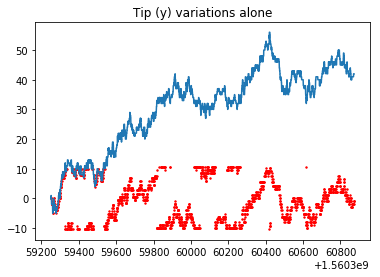

In [56]:
plt.plot(trial3_tip_alone_injection["time"],trial3_tip_alone_injection["tip"])
plt.scatter(trial3_tip_alone_retrieved["time"],trial3_tip_alone_retrieved["tip"], s=2, color="r")
plt.title("Tip (y) variations alone")
plt.savefig("test_trial3.pdf")
plt.show()

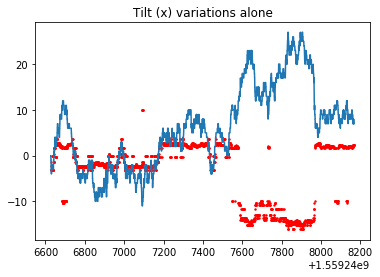

In [17]:
plt.plot(trial4_tilt_alone_injection["time"],trial4_tilt_alone_injection["tilt"])
plt.scatter(trial4_tilt_alone_retrieved["time"],trial4_tilt_alone_retrieved["tilt"], s=2, color="r")
plt.title("Tilt (x) variations alone")
plt.savefig("test_trial4.pdf")
#plt.show()

In [25]:
# take 2: try it with a smaller mask area

trial4_take2_tilt_alone_injection = pd.read_csv("trial4_take2_injection.csv", 
                                         names=["time","filename","opd","tip","tilt"])
trial4_take2_tilt_alone_retrieved = pd.read_csv("trial4_take2_retrieved.csv", 
                                         names=["time","filename","opd","tip","tilt"])

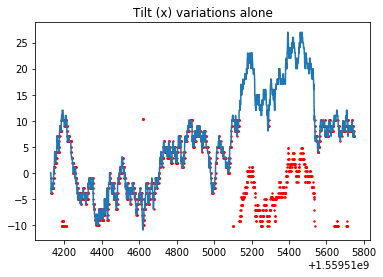

In [28]:
plt.clf()
plt.plot(trial4_take2_tilt_alone_injection["time"],trial4_take2_tilt_alone_injection["tilt"])
plt.scatter(trial4_take2_tilt_alone_retrieved["time"],trial4_take2_tilt_alone_retrieved["tilt"], s=2, color="r")
plt.title("Tilt (x) variations alone")
#plt.xlim([])
plt.savefig("test_trial4_take2.pdf")
#plt.show()

In [14]:
trial4_together = np.concatenate(([trial4_tilt_alone_injection["time"]],
                                  [trial4_tilt_alone_injection["tilt"]]),axis=0).T

In [16]:
print(trial4_together)

[[1.55924663e+09 0.00000000e+00]
 [1.55924663e+09 0.00000000e+00]
 [1.55924663e+09 0.00000000e+00]
 ...
 [1.55924817e+09 7.00000000e+00]
 [1.55924817e+09 7.00000000e+00]
 [1.55924817e+09 7.00000000e+00]]


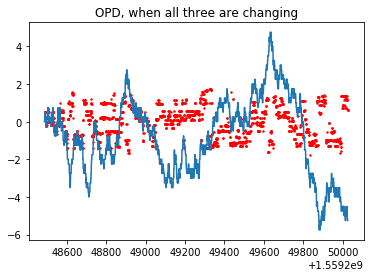

In [21]:
plt.plot(trial1_ott_injection["time"],trial1_ott_injection["opd"])
plt.scatter(trial1_ott_retrieved["time"],trial1_ott_retrieved["opd"], s=2, color="r")
plt.title("OPD, when all three are changing")
plt.savefig("test_trial1.pdf")
plt.show()

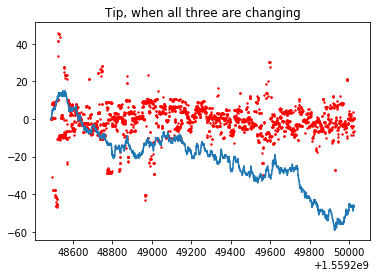

In [55]:
plt.plot(trial1_ott_injection["time"],trial1_ott_injection["tip"])
plt.scatter(trial1_ott_retrieved["time"],trial1_ott_retrieved["tip"], s=2, color="r")
plt.title("Tip, when all three are changing")
plt.show()

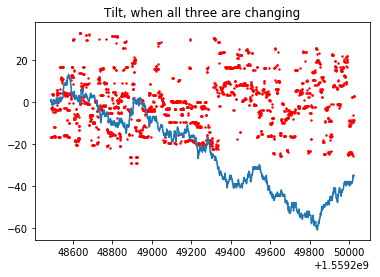

In [56]:
plt.plot(trial1_ott_injection["time"],trial1_ott_injection["tilt"])
plt.scatter(trial1_ott_retrieved["time"],trial1_ott_retrieved["tilt"], s=2, color="r")
plt.title("Tilt, when all three are changing")
plt.show()